In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


now, read data using pandas dataframe:

In [2]:
# Your code here
my_data = pd.read_csv('drug200.csv')
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
X1 = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X1.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


## 1. Sử dụng dataset được mô tả ở trên để dự đoán loại thuộc sử dung Decision Tree

In [3]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [4]:
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
print(np.unique(X[:, 1]))
print(np.unique(X[:, 2]))
print(np.unique(X[:, 3]))

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [10]:
from sklearn import preprocessing
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['HIGH', 'LOW', 'NORMAL'])
X[:,2] = le_BP.transform(X[:,2]) 

In [12]:
from sklearn import preprocessing
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['HIGH','NORMAL'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [13]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [18]:
y = my_data["Drug"]
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
print(np.shape(X_train))
print(np.shape(X_test))

(160, 5)
(40, 5)


In [23]:
print(np.shape(Y_train))
print(np.shape(Y_test))

(160,)
(40,)


In [20]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
Y_pred = drugTree.predict(X_test)

from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y))

Accuracy:  1.0


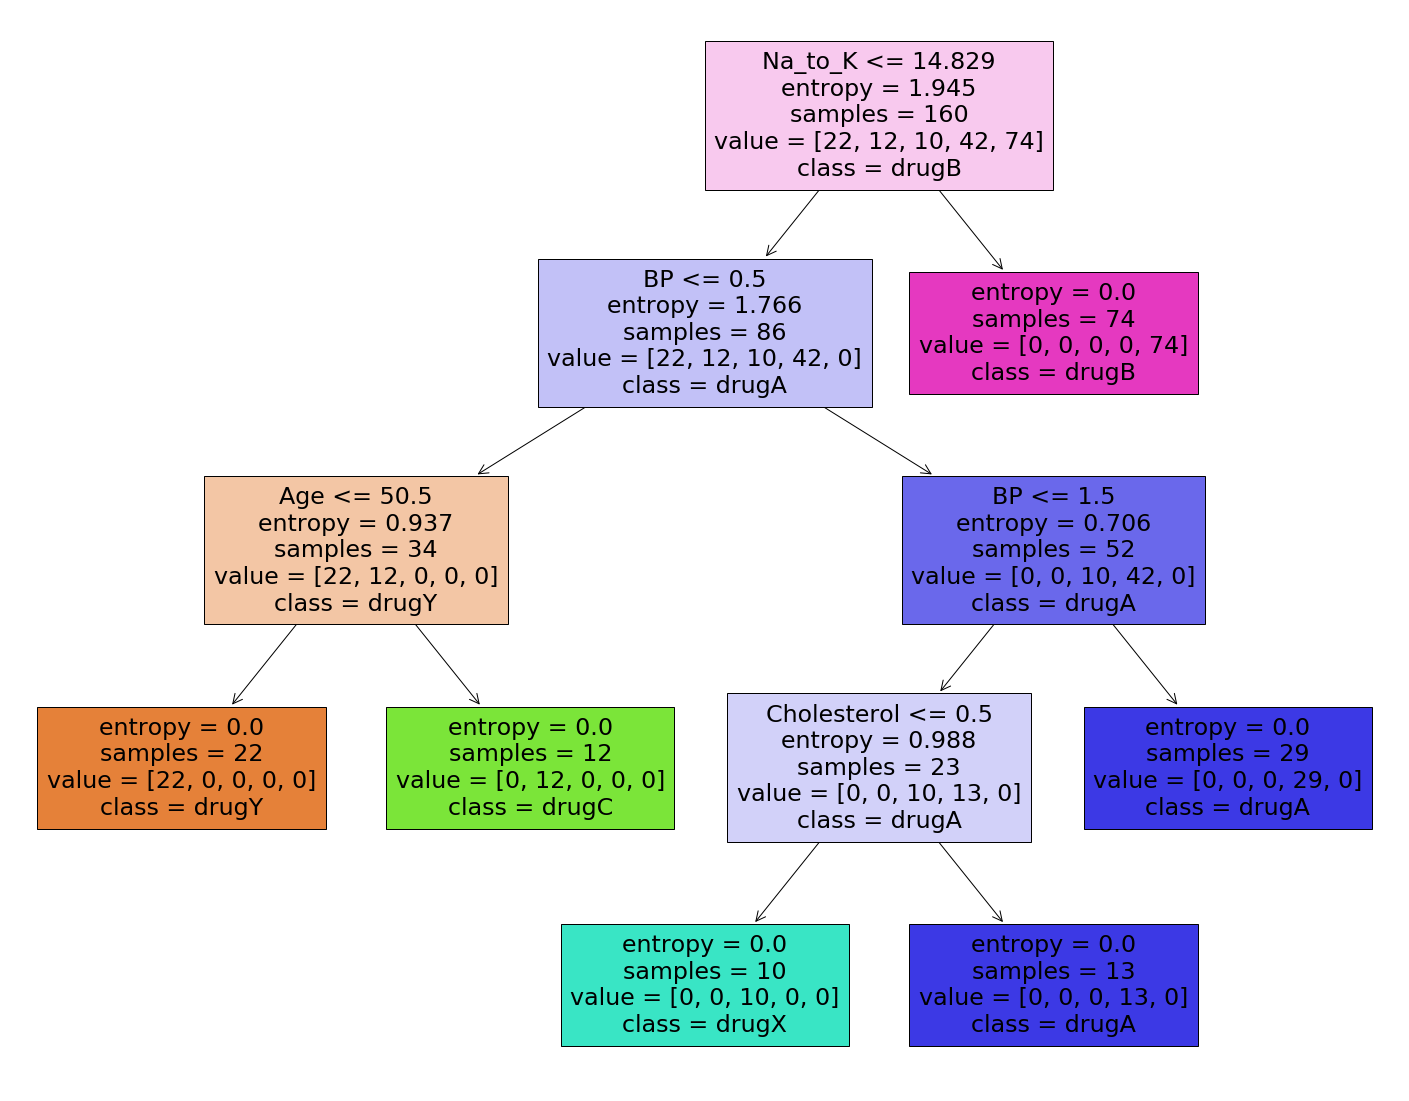

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

featureNames = my_data.columns[:5]
classNames = my_data["Drug"].unique().tolist()


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drugTree,
                   feature_names=featureNames,
                   class_names=classNames,
                   filled=True)

## 2. Tương tự câu 1 nhưng sử dụng với Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

drugRF = RandomForestClassifier(n_estimators=100, max_depth=4)
drugRF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4)

In [31]:
Y_pred_RF = drugRF.predict(X_test)
print("Random Forest Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_RF))

Random Forest Accuracy:  0.9


Regression: Output là số => accuracy đo bằng Root mean squared error


Classification (Random Forest, Decision Tree): output là class, category. VD: A, B, C, X, Y => có thể so sánh trực tiếp => pred == test

## 3. So sánh kết quả giữa hai model